# 1. 提出问题：

### 什么样的人在泰坦尼克号中更容易存活?

# 2. 理解数据

### 2.1 导入相关的库

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline

### 2.2 导入数据

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [4]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### 2.3 查看数据

In [5]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
print('训练数据集：', train.shape, '测试数据集：', test.shape)

训练数据集： (891, 12) 测试数据集： (418, 11)


In [7]:
full = train.append(test, ignore_index=True)
full.shape

(1309, 12)

In [8]:
full.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450


Cabin      : 客舱号
Embarked   : 登船港口(1起点S:Southampton，经过点C:Cherbourg,2起点Q:Queenstown)
Fare       : 船票价格
Parch      : 船上父母/子女数（不同代直系亲属数）
PassengerId: 乘客编号 
Pclass     : 客舱等级（1表示1等舱）
SibSp      : 船上兄弟姐妹数/配偶数（同代直系亲属数）
Survived   : 生存情况（1=存活， 0=死亡）
Ticket     : 船票编号

In [9]:
full.describe()

,Age,Fare,Parch,PassengerId,Pclass,SibSp,Survived
count,1046.000000,1308.000000,1309.000000,1309.000000,1309.000000,1309.000000,891.000000
mean,29.881138,33.295479,0.385027,655.000000,2.294882,0.498854,0.383838
std,14.413493,51.758668,0.865560,378.020061,0.837836,1.041658,0.486592
min,0.170000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,21.000000,7.895800,0.000000,328.000000,2.000000,0.000000,0.000000
50%,28.000000,14.454200,0.000000,655.000000,3.000000,0.000000,0.000000
75%,39.000000,31.275000,0.000000,982.000000,3.000000,1.000000,1.000000
max,80.000000,512.329200,9.000000,1309.000000,3.000000,8.000000,1.000000


# 3. 数据清洗

In [10]:
full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
Age            1046 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Fare           1308 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


In [11]:
full.dtypes

Age            float64
Cabin           object
Embarked        object
Fare           float64
Name            object
Parch            int64
PassengerId      int64
Pclass           int64
Sex             object
SibSp            int64
Survived       float64
Ticket          object
dtype: object

### 3.1 数据预处理：缺失数据处理

In [12]:
# 查看数据各列都有多少缺失值
full.isnull().sum().sort_values()

Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Ticket            0
Fare              1
Embarked          2
Age             263
Survived        418
Cabin          1014
dtype: int64

In [13]:
# 一般采用现有数据的平均值来填充缺失数据
full['Age'] = full.Age.fillna(full.Age.mean())
full['Fare'] = full.Fare.fillna(full.Fare.mean())
full.isnull().sum().sort_values()

Age               0
Fare              0
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Ticket            0
Embarked          2
Survived        418
Cabin          1014
dtype: int64

In [14]:
# 导入计数器
from collections import Counter
print(Counter(full.Embarked)) # 统计Embarked列中各值的个数

Counter({'S': 914, 'C': 270, 'Q': 123, nan: 2})


In [15]:
# 填充缺损值
full['Embarked'] = full.Embarked.fillna('S')   # 用'S'来填充Embarked列中的缺损值(NaN)
full['Cabin'] = full.Cabin.fillna('U')

In [16]:
full.isnull().sum().sort_values()

Age              0
Cabin            0
Embarked         0
Fare             0
Name             0
Parch            0
PassengerId      0
Pclass           0
Sex              0
SibSp            0
Ticket           0
Survived       418
dtype: int64

### 3.2 特征提取

In [17]:
# 通过map将性别映射为数值1与0
sex_mapDict = {'male':1, 'female':0}
full['Sex'] = full.Sex.map(sex_mapDict)
full.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,U,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,1,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,0,1,1.0,PC 17599
2,26.0,U,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,0,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,0,1,1.0,113803
4,35.0,U,S,8.0500,"Allen, Mr. William Henry",0,5,3,1,0,0.0,373450


In [18]:
#使用get_dummies进行one-hot编码，产生虚拟变量（dummy variables）,列名前缀是Embarked
embarkedDf = pd.DataFrame()
embarkedDf = pd.get_dummies(full.Embarked, prefix='Embarked')
embarkedDf.head()

,Embarked_C,Embarked_Q,Embarked_S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [19]:
# 添加one-hot编码产生的虚拟变量到数据集full
full = pd.concat([full, embarkedDf],axis=1)
# 删除源登录港口
full.drop('Embarked', axis=1, inplace=True)
full.head()

,Age,Cabin,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Embarked_C,Embarked_Q,Embarked_S
0,22.0,U,7.2500,"Braund, Mr. Owen Harris",0,1,3,1,1,0.0,A/5 21171,0,0,1
1,38.0,C85,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,0,1,1.0,PC 17599,1,0,0
2,26.0,U,7.9250,"Heikkinen, Miss. Laina",0,3,3,0,0,1.0,STON/O2. 3101282,0,0,1
3,35.0,C123,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,0,1,1.0,113803,0,0,1
4,35.0,U,8.0500,"Allen, Mr. William Henry",0,5,3,1,0,0.0,373450,0,0,1


In [20]:
PclassDf = pd.DataFrame()
PclassDf = pd.get_dummies(full.Pclass, prefix='Pclass')
full = pd.concat([full, PclassDf], axis=1)
full.drop('Pclass', axis=1, inplace=True)
full.head()

,Age,Cabin,Fare,Name,Parch,PassengerId,Sex,SibSp,Survived,Ticket,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,22.0,U,7.2500,"Braund, Mr. Owen Harris",0,1,1,1,0.0,A/5 21171,0,0,1,0,0,1
1,38.0,C85,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,0,1,1.0,PC 17599,1,0,0,1,0,0
2,26.0,U,7.9250,"Heikkinen, Miss. Laina",0,3,0,0,1.0,STON/O2. 3101282,0,0,1,0,0,1
3,35.0,C123,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,0,1,1.0,113803,0,0,1,1,0,0
4,35.0,U,8.0500,"Allen, Mr. William Henry",0,5,1,0,0.0,373450,0,0,1,0,0,1


In [21]:
# 定义函数：从姓名中获取头衔
def getTitle(name):
    str1 = name.split(',')[1] # 得到 Mr. Owen Harris
    str2 = str1.split('.')[0] # 得到 Mr
    str3 = str2.strip() #去除字符串头尾无效字符：空格等
    return str3

In [22]:
# 存放提取后的特征
titleDf = pd.DataFrame()
titleDf['Title'] = full['Name'].map(getTitle)
titleDf.head()

,Title
0,Mr
1,Mrs
2,Miss
3,Mrs
4,Mr


In [23]:
titleDf.Title.value_counts()

Mr              757
Miss            260
Mrs             197
Master           61
Dr                8
Rev               8
Col               4
Major             2
Ms                2
Mlle              2
Lady              1
Don               1
Sir               1
Dona              1
the Countess      1
Mme               1
Capt              1
Jonkheer          1
Name: Title, dtype: int64

In [25]:
# 姓名中头衔字符串与定义头衔类别的映射关系
title_mapDict = {
    'Capt':'Officer',
    'Col':'Officer',
    'Major':'Officer',
    'Jonkheer':'Royalty',
    'Don':'Royalty',
    'Sir':'Royalty',
    'Dr':'Officer',
    'Rev':'Officer',
    'the Countess':'Royalty',
    'Dona':'Royalty',
    'Mme':'Mrs',
    'Mlle':'Miss',
    'Ms':'Mrs',
    'Mr':'Mr',
    'Mrs':'Mrs',
    'Miss':'Miss',
    'Master':'Master',
    'Lady':'Royalty'
}

In [26]:
# map函数对Series每个数据应用自定义函数
titleDf['Title'] = titleDf.Title.map(title_mapDict)
titleDf = pd.get_dummies(titleDf.Title)
titleDf.head()

,Master,Miss,Mr,Mrs,Officer,Royalty
0,0,0,1,0,0,0
1,0,0,0,1,0,0
2,0,1,0,0,0,0
3,0,0,0,1,0,0
4,0,0,1,0,0,0


In [27]:
# 使用concat方法拼接，按列拼接（axis=1）
full = pd.concat([full, titleDf], axis=1)
full.drop('Name', axis=1, inplace=True)
full.head()

,Age,Cabin,Fare,Parch,PassengerId,Sex,SibSp,Survived,Ticket,Embarked_C,...,Embarked_S,Pclass_1,Pclass_2,Pclass_3,Master,Miss,Mr,Mrs,Officer,Royalty
0,22.0,U,7.2500,0,1,1,1,0.0,A/5 21171,0,...,1,0,0,1,0,0,1,0,0,0
1,38.0,C85,71.2833,0,2,0,1,1.0,PC 17599,1,...,0,1,0,0,0,0,0,1,0,0
2,26.0,U,7.9250,0,3,0,0,1.0,STON/O2. 3101282,0,...,1,0,0,1,0,1,0,0,0,0
3,35.0,C123,53.1000,0,4,0,1,1.0,113803,0,...,1,1,0,0,0,0,0,1,0,0
4,35.0,U,8.0500,0,5,1,0,0.0,373450,0,...,1,0,0,1,0,0,1,0,0,0


In [28]:
cabinDf = pd.DataFrame()
full['Cabin'] = full.Cabin.map(lambda c:c[0])
cabinDf = pd.get_dummies(full.Cabin, prefix='Cabin')
cabinDf.head()

,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U
0,0,0,0,0,0,0,0,0,1
1,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1
3,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1


In [29]:
full = pd.concat([full, cabinDf], axis=1)
full.drop('Cabin', axis=1, inplace=True)
full.head()

,Age,Fare,Parch,PassengerId,Sex,SibSp,Survived,Ticket,Embarked_C,Embarked_Q,...,Royalty,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U
0,22.0,7.2500,0,1,1,1,0.0,A/5 21171,0,0,...,0,0,0,0,0,0,0,0,0,1
1,38.0,71.2833,0,2,0,1,1.0,PC 17599,1,0,...,0,0,0,1,0,0,0,0,0,0
2,26.0,7.9250,0,3,0,0,1.0,STON/O2. 3101282,0,0,...,0,0,0,0,0,0,0,0,0,1
3,35.0,53.1000,0,4,0,1,1.0,113803,0,0,...,0,0,0,1,0,0,0,0,0,0
4,35.0,8.0500,0,5,1,0,0.0,373450,0,0,...,0,0,0,0,0,0,0,0,0,1


In [30]:
# 存放家庭信息
familyDf = pd.DataFrame()
familyDf['FamilySize'] = full.Parch + full.SibSp + 1 # 最后的 +1 是加上自己
'''
家庭类别：
小家庭 Family_Single:家庭人数=1
中等家庭Family_Small:2 <= 家庭人数 <= 4
大家庭Family——Large:家庭人数 > 4
'''
familyDf['Family_Single'] = familyDf.FamilySize.map(lambda s : 1 if s == 1 else 0)
familyDf['Family_Small'] = familyDf.FamilySize.map(lambda s : 1 if 2 <= s <= 4 else 0)
familyDf['Family_Large'] = familyDf.FamilySize.map(lambda s : 1 if s >4 else 0)
familyDf.head()

,FamilySize,Family_Single,Family_Small,Family_Large
0,2,0,1,0
1,2,0,1,0
2,1,1,0,0
3,2,0,1,0
4,1,1,0,0


In [31]:
full = pd.concat([full,familyDf],axis=1)
full.head()

,Age,Fare,Parch,PassengerId,Sex,SibSp,Survived,Ticket,Embarked_C,Embarked_Q,...,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U,FamilySize,Family_Single,Family_Small,Family_Large
0,22.0,7.2500,0,1,1,1,0.0,A/5 21171,0,0,...,0,0,0,0,0,1,2,0,1,0
1,38.0,71.2833,0,2,0,1,1.0,PC 17599,1,0,...,0,0,0,0,0,0,2,0,1,0
2,26.0,7.9250,0,3,0,0,1.0,STON/O2. 3101282,0,0,...,0,0,0,0,0,1,1,1,0,0
3,35.0,53.1000,0,4,0,1,1.0,113803,0,0,...,0,0,0,0,0,0,2,0,1,0
4,35.0,8.0500,0,5,1,0,0.0,373450,0,0,...,0,0,0,0,0,1,1,1,0,0


In [32]:
full.shape

(1309, 33)

### 3.3 特征选择

In [33]:
# 通过corr方法求出df的各列两两之间的相关性矩阵
corrDf = full.corr()
# 查看各特征与生存情况的相关系数，按降序排列
corrDf['Survived'].sort_values(ascending=False)

Survived         1.000000
Mrs              0.344935
Miss             0.332795
Pclass_1         0.285904
Family_Small     0.279855
Fare             0.257307
Cabin_B          0.175095
Embarked_C       0.168240
Cabin_D          0.150716
Cabin_E          0.145321
Cabin_C          0.114652
Pclass_2         0.093349
Master           0.085221
Parch            0.081629
Cabin_F          0.057935
Royalty          0.033391
Cabin_A          0.022287
FamilySize       0.016639
Cabin_G          0.016040
Embarked_Q       0.003650
PassengerId     -0.005007
Cabin_T         -0.026456
Officer         -0.031316
SibSp           -0.035322
Age             -0.070323
Family_Large    -0.125147
Embarked_S      -0.149683
Family_Single   -0.203367
Cabin_U         -0.316912
Pclass_3        -0.322308
Sex             -0.543351
Mr              -0.549199
Name: Survived, dtype: float64

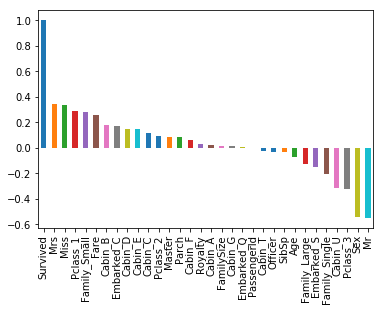

In [34]:
corrDf['Survived'].sort_values(ascending=False).plot(kind = 'bar')

In [35]:
# 特征选择
full_X = pd.concat([
    titleDf,#头衔
    PclassDf,#客舱等级
    familyDf,#家庭大小
    full['Fare'],#船票价格
    cabinDf,#船舱号
    embarkedDf,#登船港口
    full['Sex'],#性别
],axis=1)
full_X.head()

,Master,Miss,Mr,Mrs,Officer,Royalty,Pclass_1,Pclass_2,Pclass_3,FamilySize,...,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U,Embarked_C,Embarked_Q,Embarked_S,Sex
0,0,0,1,0,0,0,0,0,1,2,...,0,0,0,0,0,1,0,0,1,1
1,0,0,0,1,0,0,1,0,0,2,...,0,0,0,0,0,0,1,0,0,0
2,0,1,0,0,0,0,0,0,1,1,...,0,0,0,0,0,1,0,0,1,0
3,0,0,0,1,0,0,1,0,0,2,...,0,0,0,0,0,0,0,0,1,0
4,0,0,1,0,0,0,0,0,1,1,...,0,0,0,0,0,1,0,0,1,1


# 4.构建模型和评估模型

In [36]:
source_XData = full_X.loc[:890, :] # 选取训练数据集部分
pre_XData = full_X.loc[891:, :] # 选取测试数据集部分
source_YData = full.loc[:890, 'Survived'] # 选取训练数据集中的'Survived'列

In [37]:
print('训练集X大小=', source_XData.shape, '；训练集y大小=', source_YData.shape, '；测试集X大小=', pre_XData.shape)

训练集X大小= (891, 27) ；训练集y大小= (891,) ；测试集X大小= (418, 27)


In [38]:
full_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 27 columns):
Master           1309 non-null uint8
Miss             1309 non-null uint8
Mr               1309 non-null uint8
Mrs              1309 non-null uint8
Officer          1309 non-null uint8
Royalty          1309 non-null uint8
Pclass_1         1309 non-null uint8
Pclass_2         1309 non-null uint8
Pclass_3         1309 non-null uint8
FamilySize       1309 non-null int64
Family_Single    1309 non-null int64
Family_Small     1309 non-null int64
Family_Large     1309 non-null int64
Fare             1309 non-null float64
Cabin_A          1309 non-null uint8
Cabin_B          1309 non-null uint8
Cabin_C          1309 non-null uint8
Cabin_D          1309 non-null uint8
Cabin_E          1309 non-null uint8
Cabin_F          1309 non-null uint8
Cabin_G          1309 non-null uint8
Cabin_T          1309 non-null uint8
Cabin_U          1309 non-null uint8
Embarked_C       1309 non-null uint8
Emb

# 逻辑回归

In [39]:
#from sklearn.cross_validation import train_test_split # 已弃用
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [40]:
list_linear = []
for i in range(1000):
    train_x, test_x, train_y, test_y = train_test_split(source_XData, source_YData, train_size=0.8)
    reg_1 = LogisticRegression()
    reg_1.fit(train_x, train_y)
    list_linear.append(reg_1.score(test_x, test_y))
S_linear = pd.Series(list_linear)
S_linear.describe()

count    1000.000000
mean        0.825045
std         0.023848
min         0.748603
25%         0.810056
50%         0.826816
75%         0.843575
max         0.893855
dtype: float64

# 随机森林

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [42]:
list_Random = []
for i in range(1000):
    train_x, test_x, train_y, test_y = train_test_split(source_XData, source_YData, train_size=0.8)
    reg_2 = RandomForestClassifier(n_estimators=100)
    reg_2.fit(train_x, train_y)
    list_Random.append(reg_2.score(test_x, test_y))
S_Random = pd.Series(list_Random)
S_Random.describe()

count    1000.000000
mean        0.800475
std         0.027178
min         0.681564
25%         0.782123
50%         0.804469
75%         0.821229
max         0.877095
dtype: float64

# 支持向量机

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC, LinearSVC

In [44]:
list_SVC = []
for i in range(100):
    train_x, test_x, train_y, test_y = train_test_split(source_XData, source_YData, train_size=0.8)
    reg_3 = SVC()
    reg_3.fit(train_x, train_y)
    list_SVC.append(reg_3.score(test_x, test_y))
S_SVC = pd.Series(list_Random)
S_SVC.describe()

count    1000.000000
mean        0.800475
std         0.027178
min         0.681564
25%         0.782123
50%         0.804469
75%         0.821229
max         0.877095
dtype: float64

# Gradient Boosting Classifier

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier

In [46]:
list_Gradient = []
for i in range(100):
    train_x, test_x, train_y, test_y = train_test_split(source_XData, source_YData, train_size=0.8)
    reg_4 = GradientBoostingClassifier()
    reg_4.fit(train_x, train_y)
    list_Gradient.append(reg_4.score(test_x, test_y))
S_Gradient = pd.Series(list_Gradient)
S_Gradient.describe()

count    100.000000
mean       0.822737
std        0.026572
min        0.748603
25%        0.804469
50%        0.824022
75%        0.837989
max        0.882682
dtype: float64

# K-nearest neighbors

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [48]:
list_K = []
for i in range(100):
    train_x, test_x, train_y, test_y = train_test_split(source_XData, source_YData, train_size=0.8)
    reg_5 = KNeighborsClassifier(n_neighbors = 3)
    reg_5.fit(train_x, train_y)
    list_K.append(reg_5.score(test_x, test_y))
S_K = pd.Series(list_K)
S_K.describe()

count    100.000000
mean       0.766648
std        0.028307
min        0.698324
25%        0.748603
50%        0.765363
75%        0.782123
max        0.843575
dtype: float64

# 贝叶斯

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

In [50]:
list_bays = []
for i in range(100):
    train_x, test_x, train_y, test_y = train_test_split(source_XData, source_YData, train_size=0.8)
    reg_6 = GaussianNB()
    reg_6.fit(train_x, train_y)
    list_bays.append(reg_6.score(test_x, test_y))
S_bays = pd.Series(list_bays)
S_bays.describe()

count    100.000000
mean       0.793966
std        0.030787
min        0.720670
25%        0.770950
50%        0.793296
75%        0.815642
max        0.860335
dtype: float64

# 5.方案撰写

In [51]:
preDf = pd.DataFrame()
preDf['PassengerId'] = full.loc[891:,'PassengerId']

In [52]:
pre_XData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 891 to 1308
Data columns (total 27 columns):
Master           418 non-null uint8
Miss             418 non-null uint8
Mr               418 non-null uint8
Mrs              418 non-null uint8
Officer          418 non-null uint8
Royalty          418 non-null uint8
Pclass_1         418 non-null uint8
Pclass_2         418 non-null uint8
Pclass_3         418 non-null uint8
FamilySize       418 non-null int64
Family_Single    418 non-null int64
Family_Small     418 non-null int64
Family_Large     418 non-null int64
Fare             418 non-null float64
Cabin_A          418 non-null uint8
Cabin_B          418 non-null uint8
Cabin_C          418 non-null uint8
Cabin_D          418 non-null uint8
Cabin_E          418 non-null uint8
Cabin_F          418 non-null uint8
Cabin_G          418 non-null uint8
Cabin_T          418 non-null uint8
Cabin_U          418 non-null uint8
Embarked_C       418 non-null uint8
Embarked_Q       418 non-n

In [53]:
preDf['Survived'] = reg_1.predict(pre_XData)
preDf['Survived'] = preDf['Survived'].astype(int)
preDf.head()

,PassengerId,Survived
891,892,0
892,893,1
893,894,0
894,895,0
895,896,1


In [54]:
preDf.to_csv('My_submission.csv', index = False)